# HR_Attrition

Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

#  HR Analylics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

# Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

# Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

# Task

How does HR Analytics help in analyzing attrition?

# Target Variable

Attrition- Whether the employee will stay in a company or leave the company

# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

# Load DataSet

In [164]:
df= pd.read_excel(r'C:\python\HR_Attrition.xlsx')

In [165]:
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


# To find shape and type of the dataset

In [122]:
df.shape

(1470, 35)

In [123]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

There are certain categorical columns in the dataset, which needs to be encoded before being trained into a model

In [124]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# Data Exploration

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

There are 35 features including the Target variable.

# Drop columns with single values

Certain column seems to have only one value throughout the dataset which will not be much use to the target. So we will remove it.

In [166]:
len(df['EmployeeCount'].unique()) 

1

In [167]:
one_value = dict()
for i in df.columns:
    if len(df[i].unique()) == 1:
        one_value.update({i: df[i].unique().tolist()})
        
print('Columns with single value: %s ' % one_value)

Columns with single value: {'EmployeeCount': [1], 'Over18': ['Y'], 'StandardHours': [80]} 


In [168]:
df.drop(['EmployeeCount', 'Over18', 'StandardHours','EmployeeNumber'], axis=1, inplace=True)

In [169]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


# Check For Null Values

In [129]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

<AxesSubplot:>

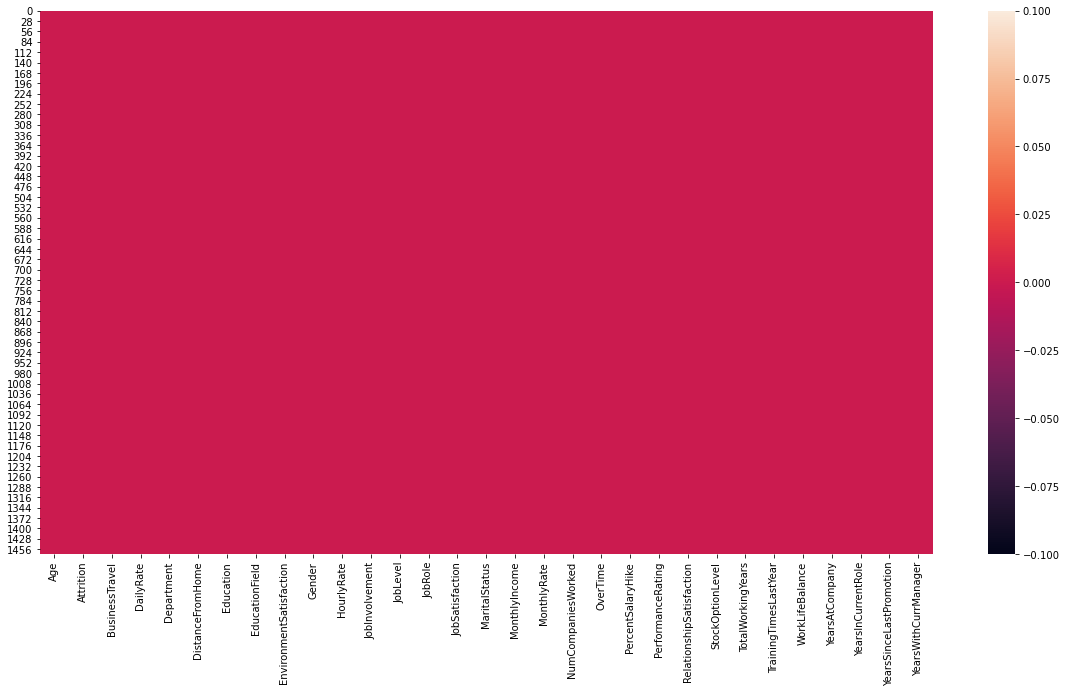

In [130]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull())

There are no null values in the dataset. So we shall proceed with the further analysis

Categorical Data

In [131]:
cat_columns=[x for x in df.dtypes.index if df.dtypes[x]=='object']
cat_columns       

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [132]:
num_columns=[x for x in df.dtypes.index if df.dtypes[x]=='int64']
num_columns

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

# Analyse The Target Variable

In [133]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

<AxesSubplot:xlabel='Attrition', ylabel='count'>

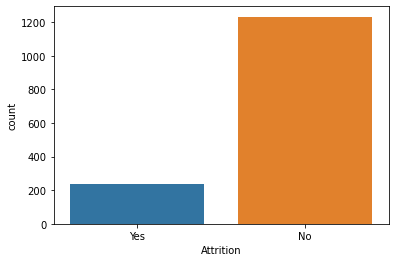

In [134]:
sns.countplot(df['Attrition'])

Attrition shows that most employees stay in the company. Very less employees leave the company. 

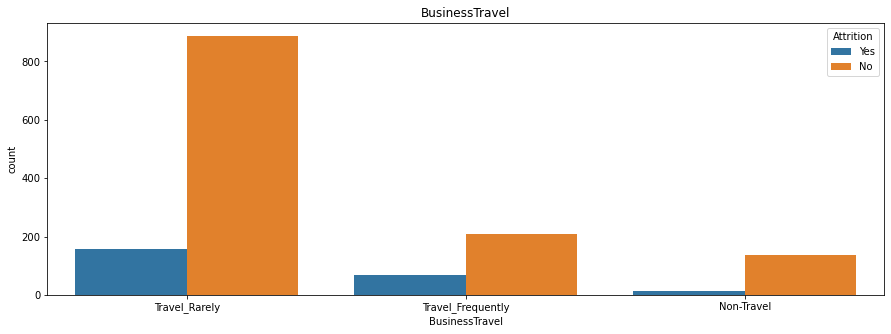

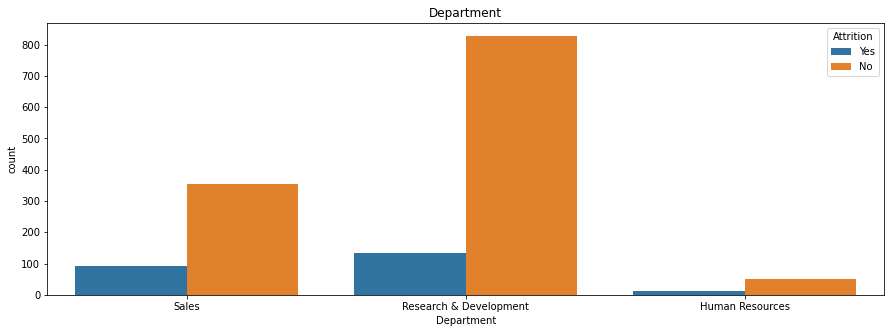

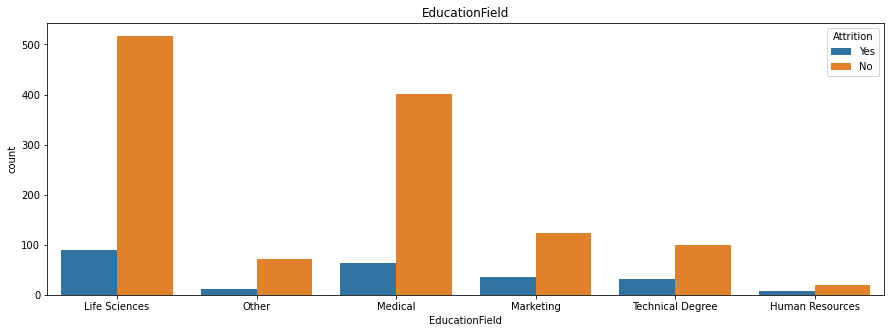

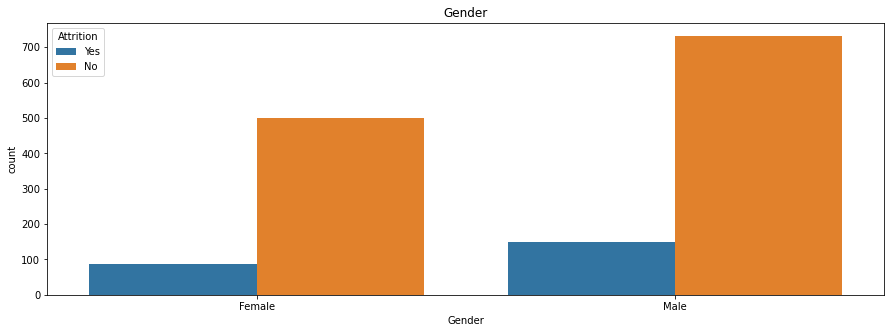

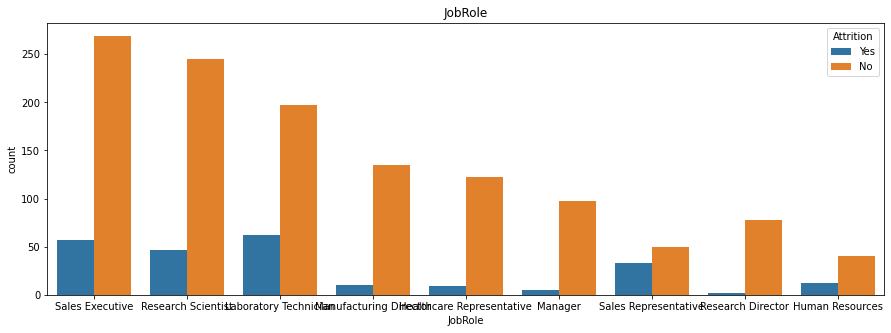

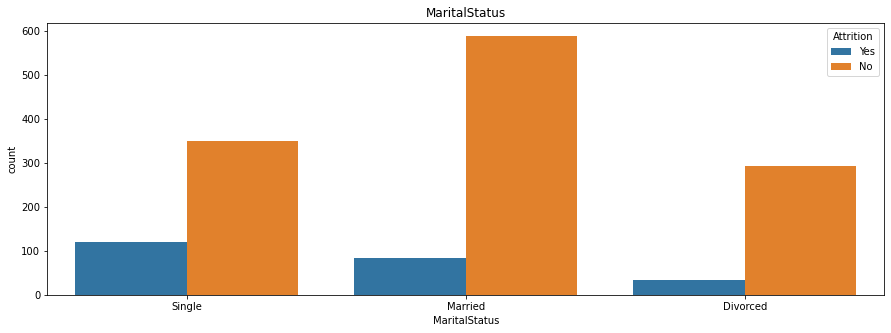

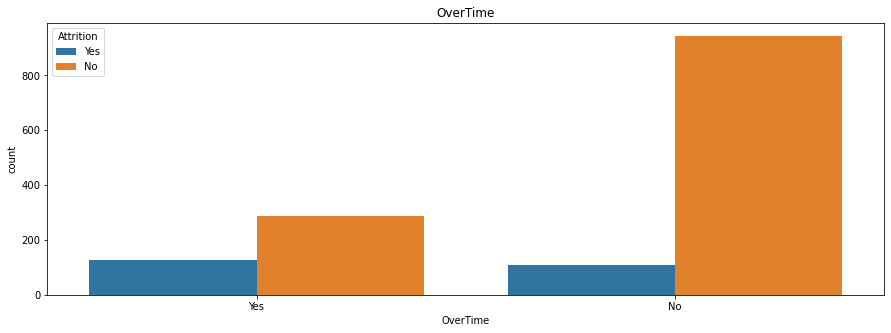

In [135]:
for i in cat_columns[1:]:
    plt.figure(figsize=(15,5))
    sns.countplot(x=df[i], hue='Attrition', data=df)
    plt.title(i)
    plt.show()

Business Travel:
     Business travel doesnt impact the Target variable much. Attrition is less with non travel prefering employees.
     
Department:
     Research and Development Department employees are high in count also the Attrition is high with them compared to the other department.
     
Educational Field:
    The Attrition is high with Life Science and Medical qualification people, where as HR employees have low attrition.

Gender:
    Males have high attrition than females
    
JobRole:
    The Lab Technicians have high attrition and research director have very low attrition.
    
Marital Status:
    Singles prefer to change the job often contributing high attrition.
    
OverTime:
    With No Over Time more employees tend to stay in the company.



# Encode The Categorical Data

In [170]:
LE= LabelEncoder()

In [171]:
df['Attrition']= LE.fit_transform(df['Attrition'])
LE.inverse_transform([1,0])

array(['Yes', 'No'], dtype=object)

In [172]:
df['BusinessTravel']= LE.fit_transform(df['BusinessTravel'])
LE.inverse_transform([2,1,0])

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [173]:
df['Department']= LE.fit_transform(df['Department'])
LE.inverse_transform([2,1,0])

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [174]:
df['EducationField']= LE.fit_transform(df['EducationField'])
LE.inverse_transform([5,4,3,2,1,0])

array(['Technical Degree', 'Other', 'Medical', 'Marketing',
       'Life Sciences', 'Human Resources'], dtype=object)

In [175]:
df['Gender']= LE.fit_transform(df['Gender'])

In [176]:
df['JobRole']= LE.fit_transform(df['JobRole'])
LE.inverse_transform([8,7,6,5,4,3,2,1,0])

array(['Sales Representative', 'Sales Executive', 'Research Scientist',
       'Research Director', 'Manufacturing Director', 'Manager',
       'Laboratory Technician', 'Human Resources',
       'Healthcare Representative'], dtype=object)

In [177]:
df['MaritalStatus']= LE.fit_transform(df['MaritalStatus'])
LE.inverse_transform([2,1,0])

array(['Single', 'Married', 'Divorced'], dtype=object)

In [178]:
df['OverTime']= LE.fit_transform(df['OverTime'])
LE.inverse_transform([1,0])

array(['Yes', 'No'], dtype=object)

In [179]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,3,1,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,4,1,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2,1,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,4,1,...,3,4,0,17,3,2,9,6,0,8


# Data Description

In [180]:
df.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,2.721769,0.600000,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,1.093082,0.490065,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,2.000000,0.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,3.000000,1.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,4.000000,1.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,4.000000,1.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# Correlation

In [147]:
df.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,0.010146,-0.036311,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,-0.103369,0.029453,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,0.004174,-0.032981,...,-0.026341,-0.035986,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,0.018355,-0.011716,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,-0.019395,-0.041583,...,-0.024604,-0.022414,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,-0.016075,-0.001851,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,-0.027128,-0.016547,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,0.043163,-0.002504,...,-0.005614,-0.004378,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EnvironmentSatisfaction,0.010146,-0.103369,0.004174,0.018355,-0.019395,-0.016075,-0.027128,0.043163,1.000000,0.000508,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
Gender,-0.036311,0.029453,-0.032981,-0.011716,-0.041583,-0.001851,-0.016547,-0.002504,0.000508,1.000000,...,-0.013859,0.022868,0.012716,-0.046881,-0.038787,-0.002753,-0.029747,-0.041483,-0.026985,-0.030599


<AxesSubplot:>

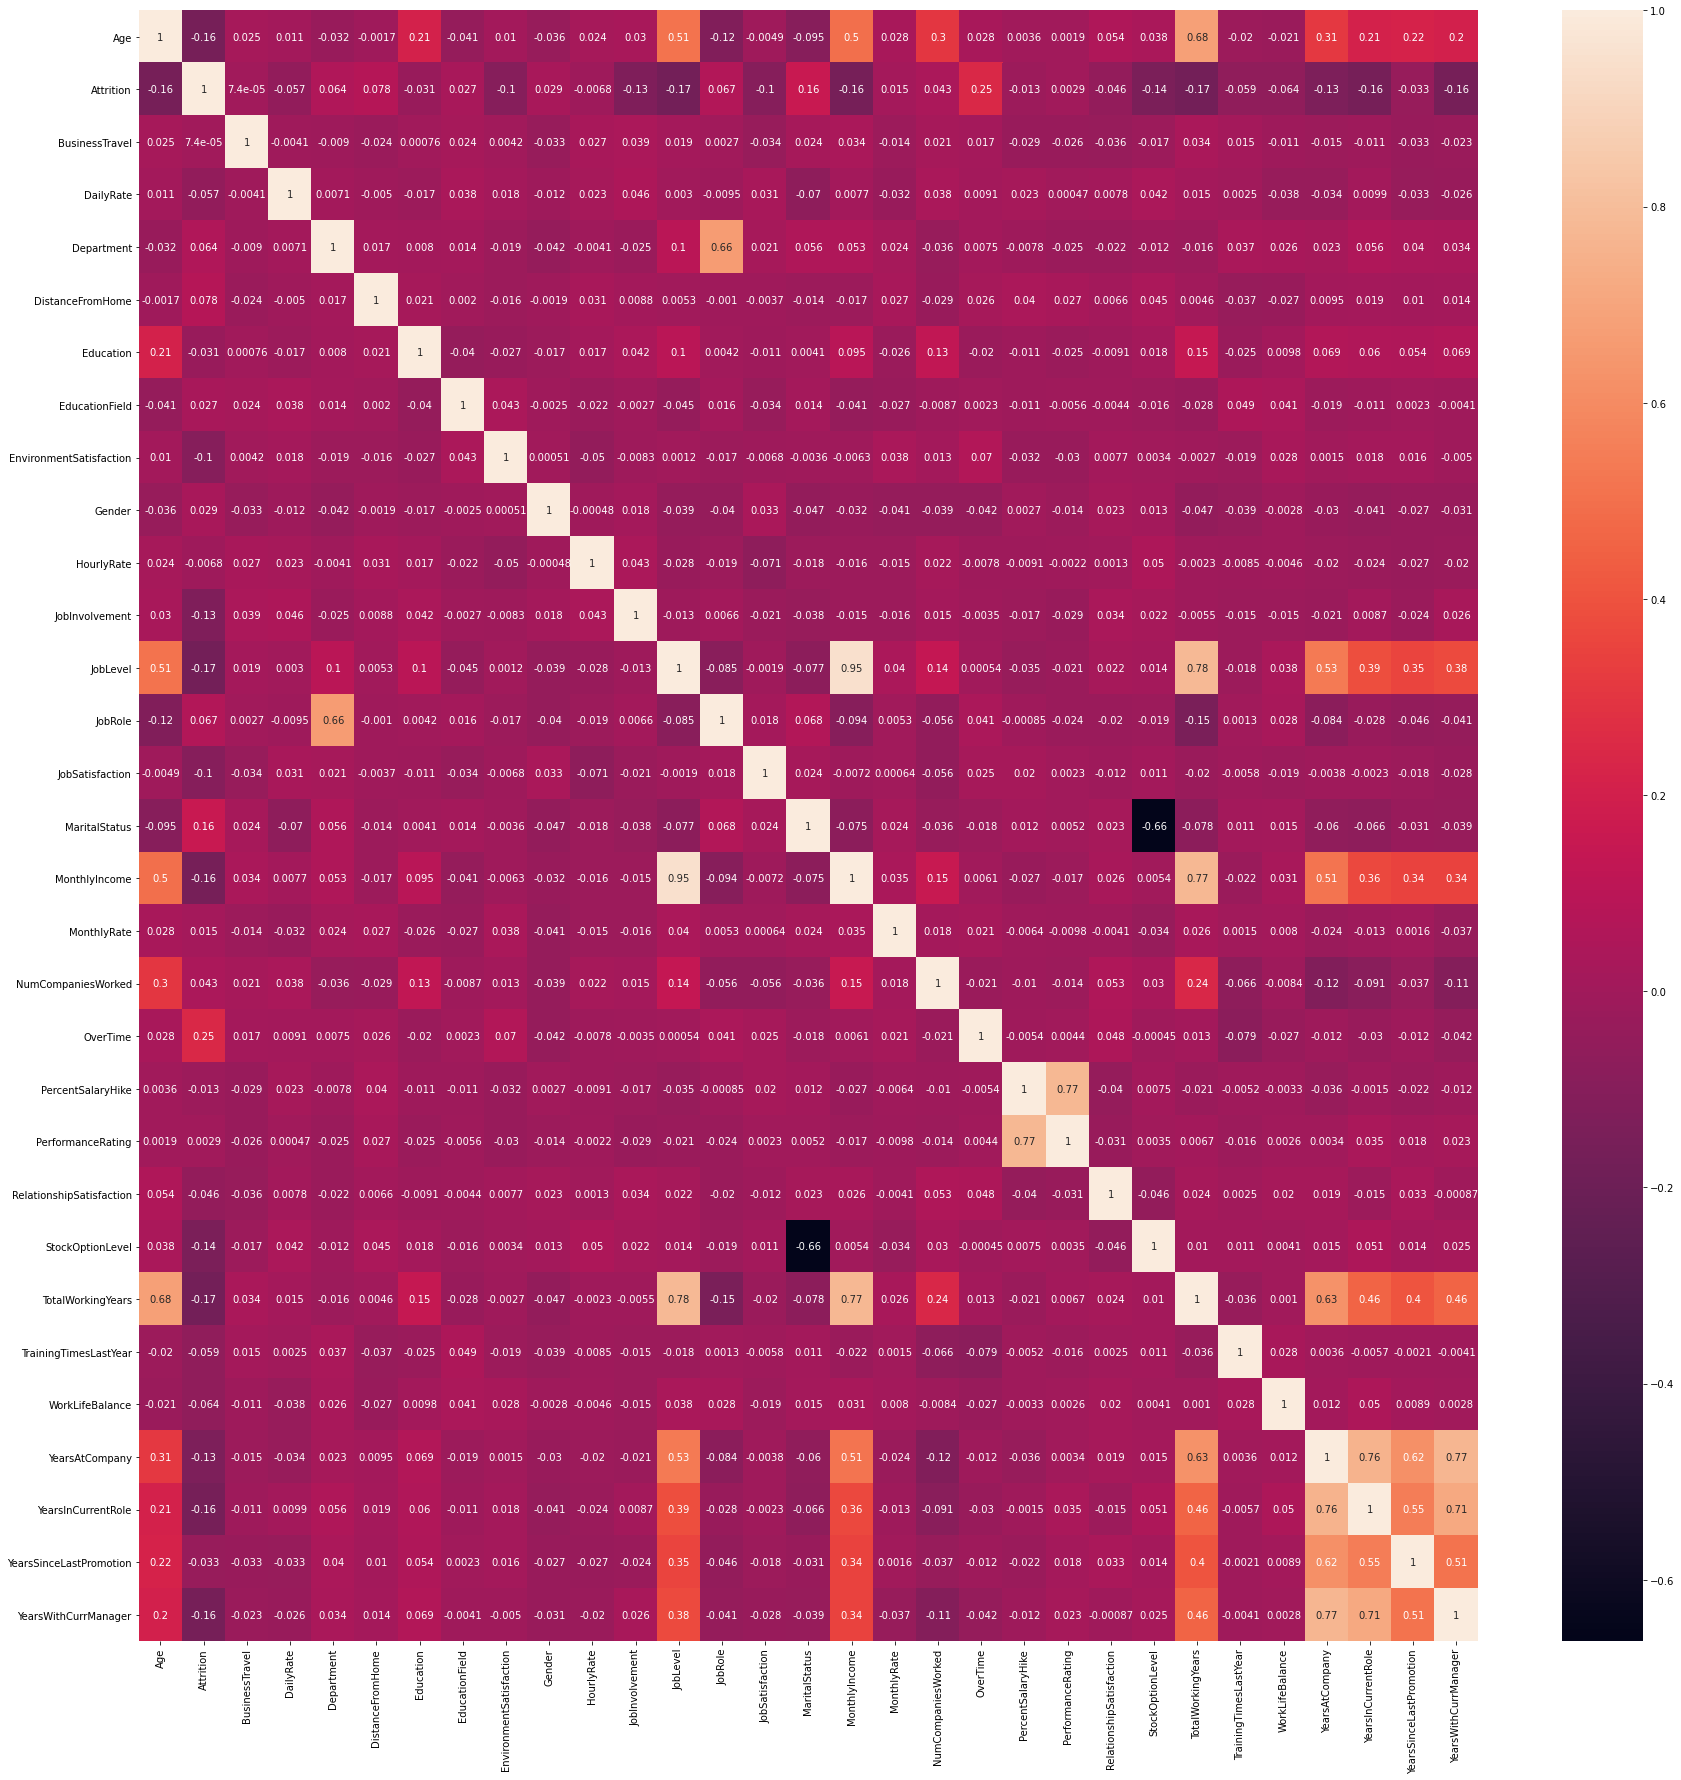

In [148]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(), annot= True)

Yearsatcompany and YearsinCurrentrole are in good correlation.
Yearsatcompany and Yearswithcurrentmanager are in good correlation.
PercentSalaryHike and PerformanceRating are highly correlated.

YearsSinceLastPromotion, OverTime, MaritalStatus, JobRole,DistanceFromHome and Department contributes to the Attrition 

 Numerical Columns

In [149]:
def num_col(df,features,target = "Attrition"):
    fig, ax = plt.subplots(ncols= 2, figsize = (14,6))    

    #boxplot for comparison
    sns.boxplot(x = target, y = features, data=df, ax=ax[0])
    ax[0].set_title("Comparision of " + features + " vs " + target)
    
    #distribution plot
    ax[1].set_title("Distribution of "+features)
    ax[1].set_ylabel("Frequency")
    sns.distplot(a = df[features], ax=ax[1], kde=False)
    
    plt.show()

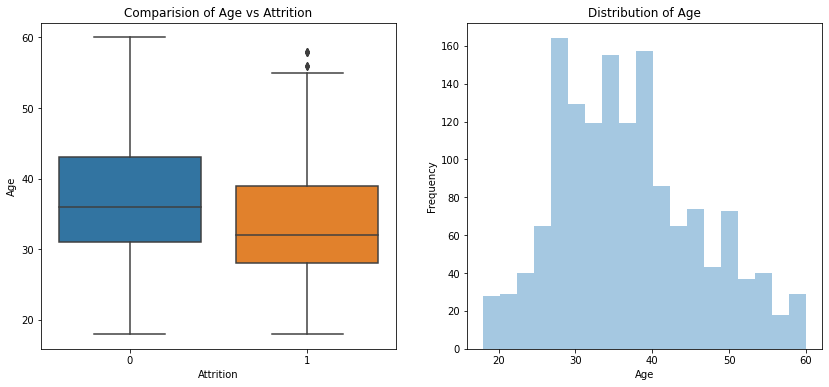

In [113]:
num_col(df,features = "Age")

From distribution plot,Minimum age is 18 Yrs and Maximum age is 60 Yrs.
From the boxplot, majority of people who left the company are below 40 Yrs and among the people who retained are of age 32 to 40 years

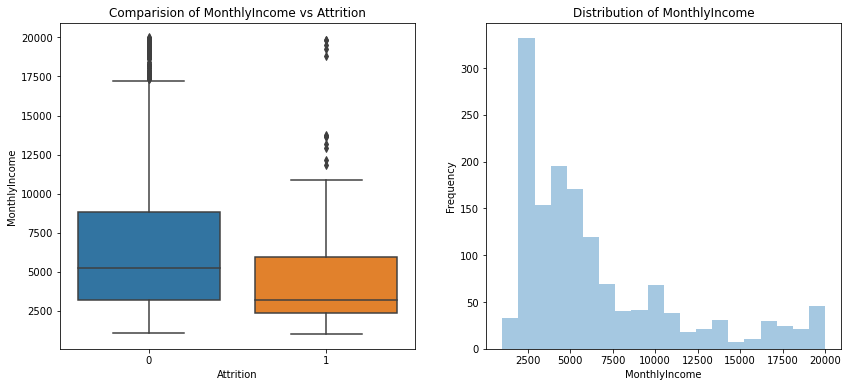

In [116]:
num_col(df,features = "MonthlyIncome")

Monthly income is distributed from 1500 to 20000. Highest number of employees get salary of 2500.
 People with high monthly income tend to be retained.

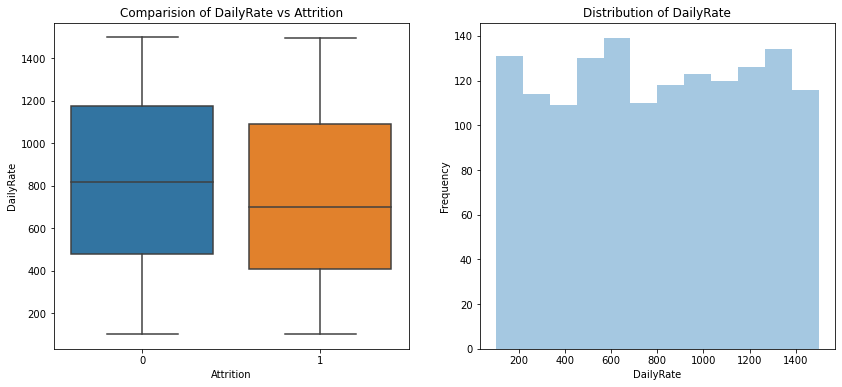

In [118]:
num_col(df,features = "DailyRate")

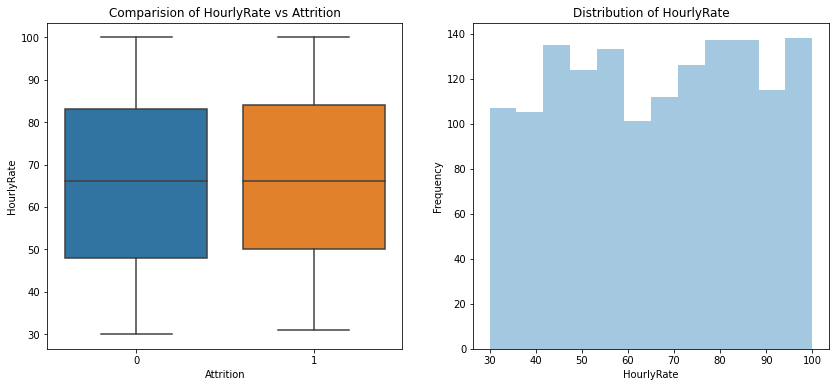

In [119]:
num_col(df,features = "HourlyRate")

Employees working with lower daily rates are more likely to leave the company, whereas hourly rate doesnt have any impact on Attrition

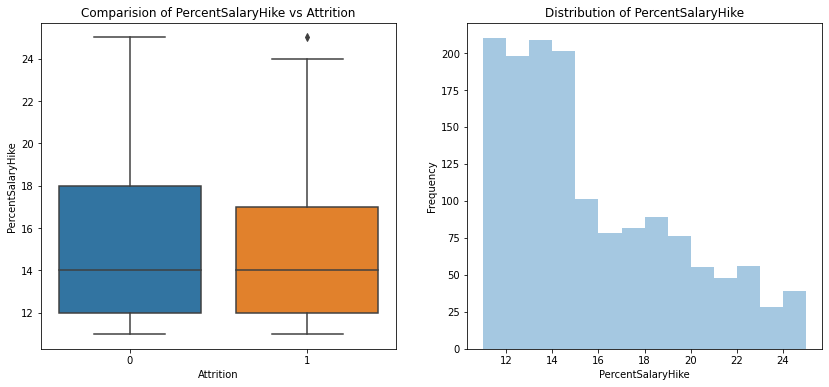

In [150]:
num_col(df,features = "PercentSalaryHike")

Employees who dont receive good hike tend to leave the company

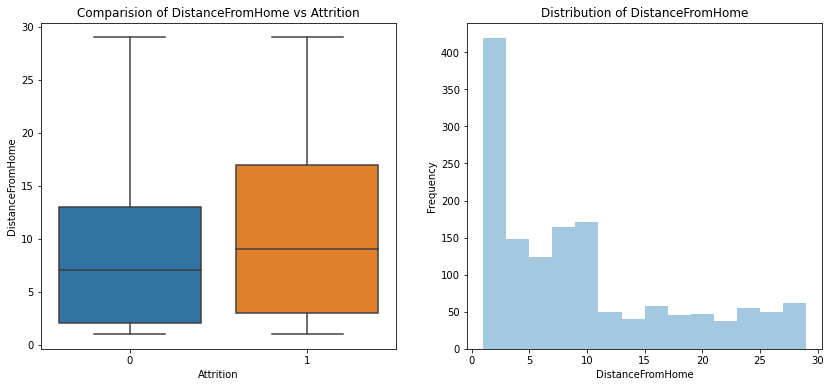

In [151]:
num_col(df,features = "DistanceFromHome")

Most employees reside near the work place, so if distancefromhome is high posibility of attrition is also high

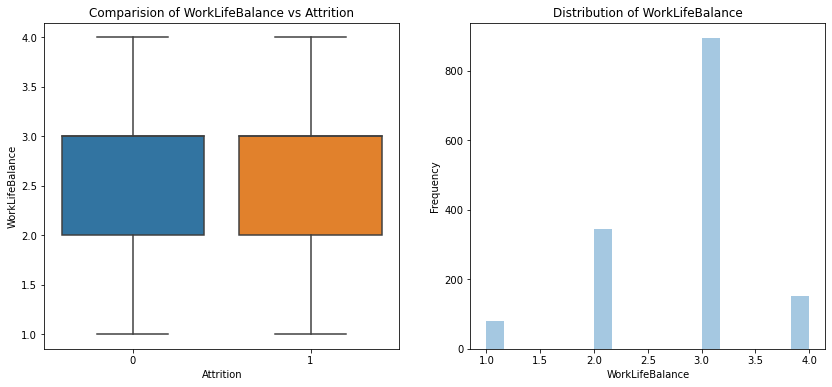

In [152]:
num_col(df,features = "WorkLifeBalance")

Worklifebalance has no big contribution to attrition

Work with certain varibles against Gender

<AxesSubplot:xlabel='Gender', ylabel='DistanceFromHome'>

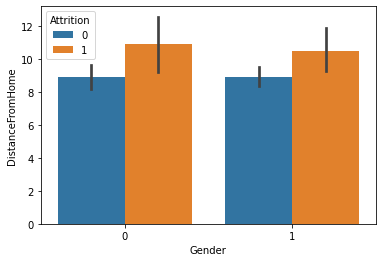

In [153]:
sns.barplot(df['Gender'],df['DistanceFromHome'],hue = df['Attrition'])

Distance from home very important to women employees more than men.

<AxesSubplot:xlabel='Gender', ylabel='YearsInCurrentRole'>

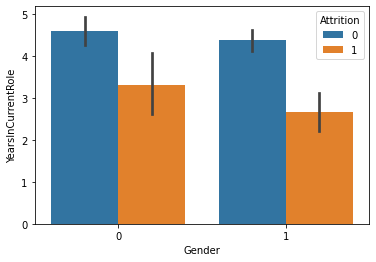

In [154]:
sns.barplot(df['Gender'],df['YearsInCurrentRole'],hue = df['Attrition'])

Female employees are more prone to stay in a company and in one role for a longer time.

Now we shall check the collinearity between columns with VIF

# Check For Multi Collinearity- VIF

In [181]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [182]:
df1=df.drop('Attrition', axis=1)

In [183]:
df1

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,2,0,94,...,3,1,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,3,1,61,...,4,4,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,4,1,92,...,3,2,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,4,0,56,...,3,3,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,1,1,40,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,884,1,23,2,3,3,1,41,...,3,3,1,17,3,3,5,2,0,3
1466,39,2,613,1,6,1,3,4,1,42,...,3,1,1,9,5,3,7,7,1,7
1467,27,2,155,1,4,3,1,2,1,87,...,4,2,1,6,0,3,6,2,0,3
1468,49,1,1023,2,2,3,3,4,1,63,...,3,4,0,17,3,2,9,6,0,8


In [184]:
def vif_fun():
    vif=pd.DataFrame()
    vif['vif_factor']= [variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]
    vif['features']= df1.columns
    return(vif)

In [185]:
vif_fun()

,vif_factor,features
0,33.303362,Age
1,6.744873,BusinessTravel
2,4.973985,DailyRate
3,12.973418,Department
4,2.317141,DistanceFromHome
5,9.453687,Education
6,3.866745,EducationField
7,7.109660,EnvironmentSatisfaction
8,2.506220,Gender
9,11.244053,HourlyRate


PercentSalaryHike and JobLevel have high collinearity, among which PercentSalaryHike contributes more to the target.

Age and Monthly income have high collinearity, in which Age has little more towards Target.

In [186]:
df.drop(['JobLevel', 'MonthlyIncome'], axis=1, inplace=True)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,3,1,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,4,1,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2,1,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,4,1,...,3,4,0,17,3,2,9,6,0,8


In [187]:
df1=df.drop('Attrition', axis=1)

In [188]:
vif_fun()

,vif_factor,features
0,33.172731,Age
1,6.735003,BusinessTravel
2,4.973663,DailyRate
3,12.146765,Department
4,2.305121,DistanceFromHome
5,9.450171,Education
6,3.862510,EducationField
7,7.097766,EnvironmentSatisfaction
8,2.505718,Gender
9,11.231601,HourlyRate


PercentSalaryHike and Age have high collinearity, among which PercentSalaryHike contributes more to the target.

In [ ]:
df.drop('Age', axis=1,inplace=True)

In [201]:
df.drop('PerformanceRating', axis=1,inplace=True)

In [202]:
df1= df.drop('Attrition', axis=1)

In [203]:
vif_fun()

,vif_factor,features
0,6.597533,BusinessTravel
1,4.939380,DailyRate
2,12.088211,Department
3,2.300803,DistanceFromHome
4,8.994773,Education
5,3.829501,EducationField
6,6.925949,EnvironmentSatisfaction
7,2.490366,Gender
8,10.728335,HourlyRate
9,14.373412,JobInvolvement


Now the multi collinearity between the columns are removed. So we shall proceed for the removal of skewness

# Check For Skewness

In [204]:
df1.skew().sort_values(ascending=False)

YearsSinceLastPromotion     1.984290
YearsAtCompany              1.764529
TotalWorkingYears           1.117172
NumCompaniesWorked          1.026471
StockOptionLevel            0.968980
OverTime                    0.964489
DistanceFromHome            0.958118
YearsInCurrentRole          0.917363
YearsWithCurrManager        0.833451
PercentSalaryHike           0.821128
TrainingTimesLastYear       0.553124
EducationField              0.550371
Department                  0.172231
MonthlyRate                 0.018578
DailyRate                  -0.003519
HourlyRate                 -0.032311
MaritalStatus              -0.152175
Education                  -0.289681
RelationshipSatisfaction   -0.302828
EnvironmentSatisfaction    -0.321654
JobSatisfaction            -0.329672
JobRole                    -0.357270
Gender                     -0.408665
JobInvolvement             -0.498419
WorkLifeBalance            -0.552480
BusinessTravel             -1.439006
dtype: float64

YearsSinceLastPromotion,YearsAtCompany,TotalWorkingYears,NumCompaniesWorked have skewness. 

In [205]:
from sklearn.preprocessing import power_transform
df1_new= power_transform(df1)

In [206]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df1_new= sc.fit_transform(df1_new)
df1_new

array([[ 0.63546836,  0.7592893 ,  1.37745428, ...,  0.2055623 ,
        -1.09486169,  0.49014719],
       [-1.39286498, -1.33459724, -0.47212715, ...,  0.883888  ,
         0.09685415,  0.90963491],
       [ 0.63546836,  1.34036452, -0.47212715, ..., -1.59643394,
        -1.09486169, -1.55015588],
       ...,
       [ 0.63546836, -1.75171312, -0.47212715, ..., -0.44664507,
        -1.09486169, -0.05300033],
       [-1.39286498,  0.58323545,  1.37745428, ...,  0.68299511,
        -1.09486169,  1.09011007],
       [ 0.63546836, -0.35884464, -0.47212715, ..., -0.08961473,
         0.09685415, -0.40688122]])

In [207]:
df1=pd.DataFrame(df1_new, columns= df1.columns)
df1

,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.635468,0.759289,1.377454,-1.494085,-0.916940,-0.960488,-0.706596,-1.224745,1.354630,0.326033,...,-1.488918,-1.529513,-1.087933,-0.244305,-2.579073,-2.144446,0.139692,0.205562,-1.094862,0.490147
1,-1.392865,-1.334597,-0.472127,0.243416,-1.771185,-0.960488,0.208597,0.816497,-0.210675,-1.058710,...,1.679689,1.229016,0.548969,0.052495,0.217384,0.276821,0.762660,0.883888,0.096854,0.909635
2,0.635468,1.340365,-0.472127,-1.031215,-0.916940,1.247620,1.209516,0.816497,1.263094,-1.058710,...,0.201133,-0.700130,-1.087933,-0.410500,0.217384,0.276821,-2.229592,-1.596434,-1.094862,-1.550156
3,-1.392865,1.379936,-0.472127,-0.700347,1.082871,-0.960488,1.209516,-1.224745,-0.460197,0.326033,...,-1.488918,0.225164,-1.087933,-0.244305,0.217384,0.276821,0.482432,0.883888,0.905592,-1.550156
4,0.635468,-0.453941,-0.472127,-1.031215,-1.771185,0.697390,-1.518118,0.816497,-1.289301,0.326033,...,-0.948760,1.229016,0.548969,-0.592063,0.217384,0.276821,-0.951540,-0.446645,0.607464,-0.406881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-1.392865,0.264672,-0.472127,1.407126,-0.916940,0.697390,0.208597,0.816497,-1.235882,2.014107,...,0.719724,0.225164,0.548969,0.859893,0.217384,0.276821,-0.066114,-0.446645,-1.094862,-0.053000
1466,0.635468,-0.397219,-0.472127,-0.050827,-1.771185,0.697390,1.209516,0.816497,-1.182703,-1.058710,...,0.201133,-1.529513,0.548969,-0.090665,1.615639,0.276821,0.320677,0.883888,0.096854,0.909635
1467,0.635468,-1.751713,-0.472127,-0.442291,0.040522,-0.960488,-0.706596,0.816497,1.032601,2.014107,...,1.281630,-0.700130,0.548969,-0.592063,-2.579073,0.276821,0.139692,-0.446645,-1.094862,-0.053000
1468,-1.392865,0.583235,1.377454,-1.031215,0.040522,0.697390,1.209516,0.816497,-0.111945,-1.058710,...,-0.121307,1.229016,-1.087933,0.859893,0.217384,-1.108624,0.628829,0.682995,-1.094862,1.090110


In [208]:
df1.skew().sort_values(ascending=False)

OverTime                    0.964489
YearsSinceLastPromotion     0.212129
PercentSalaryHike           0.116250
StockOptionLevel            0.087019
TrainingTimesLastYear       0.058058
NumCompaniesWorked          0.014814
Department                  0.013801
DistanceFromHome           -0.007468
EducationField             -0.008386
YearsAtCompany             -0.008683
TotalWorkingYears          -0.010653
WorkLifeBalance            -0.012286
JobInvolvement             -0.020365
YearsInCurrentRole         -0.060849
YearsWithCurrManager       -0.067565
Education                  -0.099881
HourlyRate                 -0.106461
MaritalStatus              -0.156911
MonthlyRate                -0.184087
RelationshipSatisfaction   -0.193634
DailyRate                  -0.196160
EnvironmentSatisfaction    -0.205395
JobSatisfaction            -0.212815
JobRole                    -0.319659
Gender                     -0.408665
BusinessTravel             -0.970506
dtype: float64

In [209]:
df1.skew()[np.abs(df1.skew())<0.25].all()

True

In [210]:
skewed_data=df1.skew()
skewed_data

BusinessTravel             -0.970506
DailyRate                  -0.196160
Department                  0.013801
DistanceFromHome           -0.007468
Education                  -0.099881
EducationField             -0.008386
EnvironmentSatisfaction    -0.205395
Gender                     -0.408665
HourlyRate                 -0.106461
JobInvolvement             -0.020365
JobRole                    -0.319659
JobSatisfaction            -0.212815
MaritalStatus              -0.156911
MonthlyRate                -0.184087
NumCompaniesWorked          0.014814
OverTime                    0.964489
PercentSalaryHike           0.116250
RelationshipSatisfaction   -0.193634
StockOptionLevel            0.087019
TotalWorkingYears          -0.010653
TrainingTimesLastYear       0.058058
WorkLifeBalance            -0.012286
YearsAtCompany             -0.008683
YearsInCurrentRole         -0.060849
YearsSinceLastPromotion     0.212129
YearsWithCurrManager       -0.067565
dtype: float64

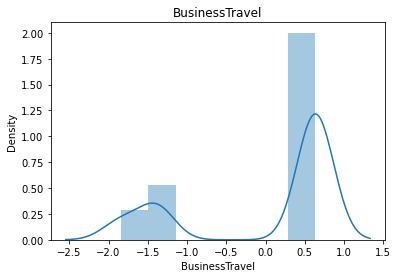

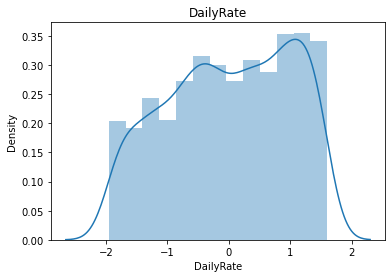

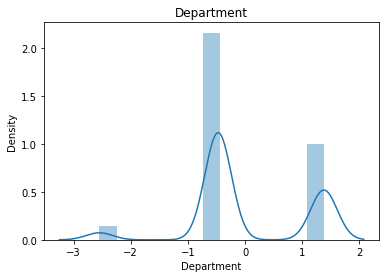

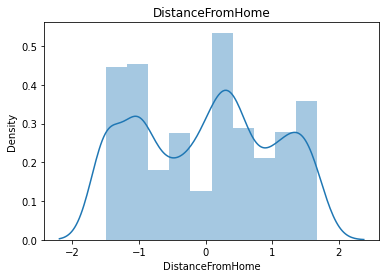

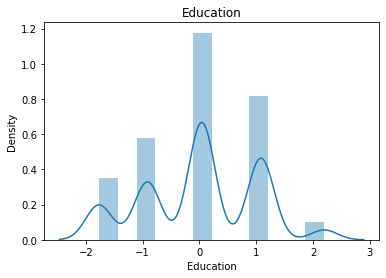

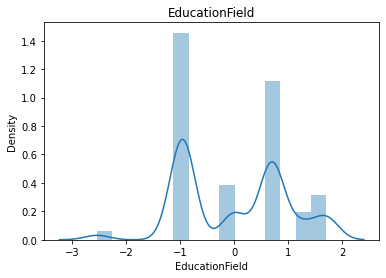

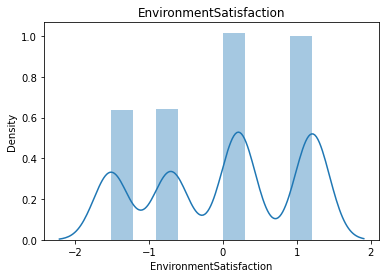

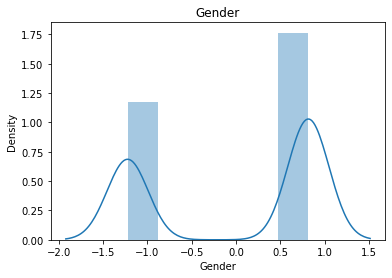

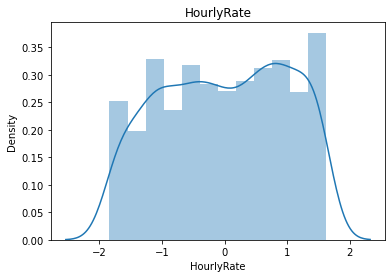

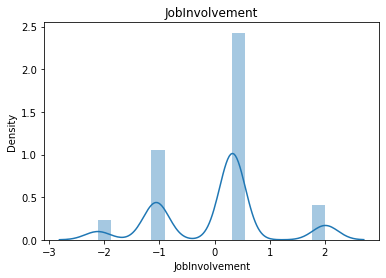

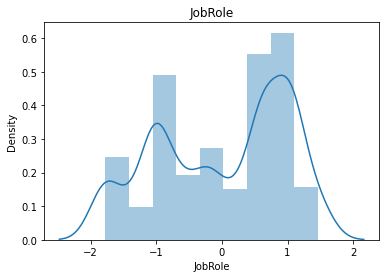

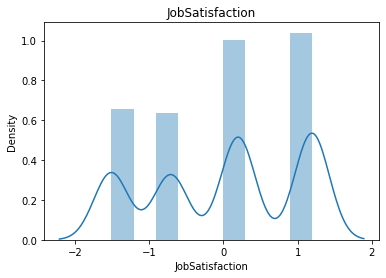

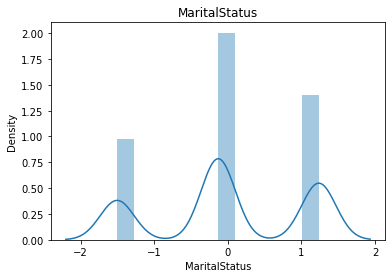

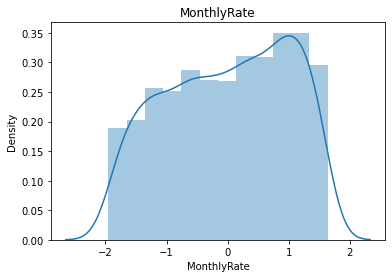

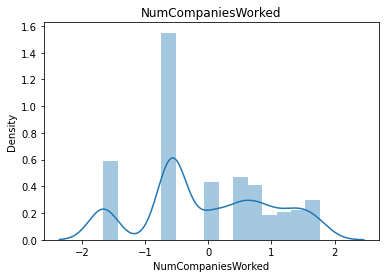

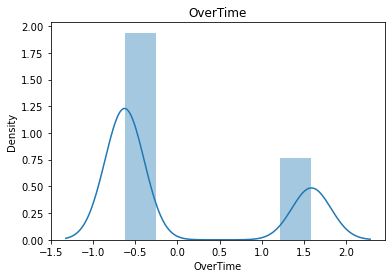

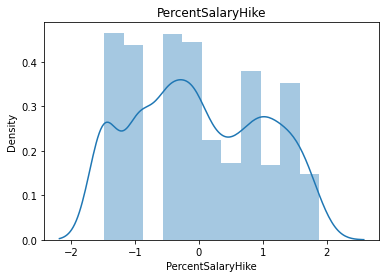

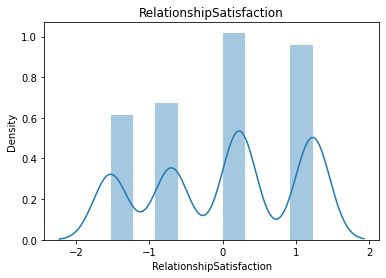

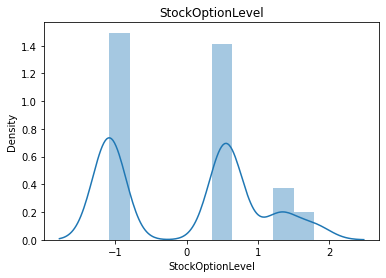

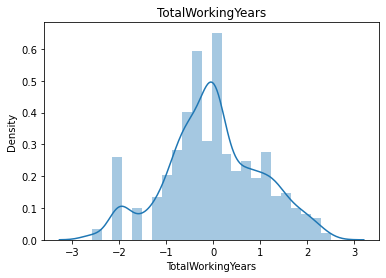

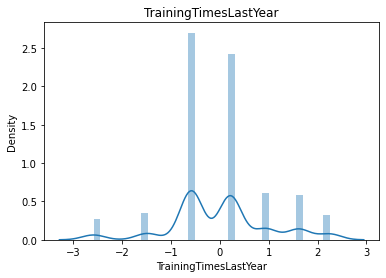

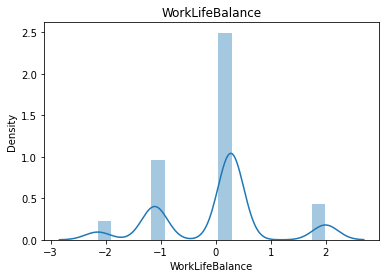

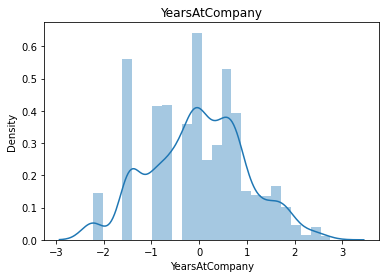

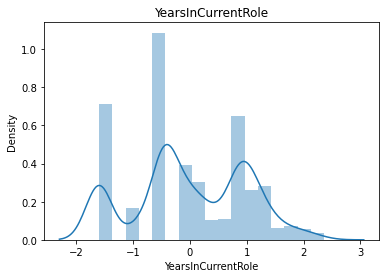

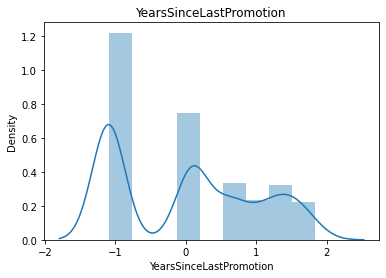

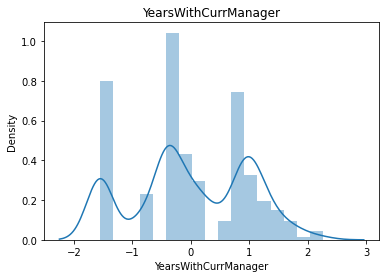

In [211]:
for i in df1.columns:
    sns.distplot(df1[i])
    plt.title(i)
    plt.show()

Now after removal of skewness, the curves cannot be normalized, but the skewness is reduced considerably in each columns

In [212]:
df1['Attrition']= df['Attrition']

In [213]:
df1

,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0.635468,0.759289,1.377454,-1.494085,-0.916940,-0.960488,-0.706596,-1.224745,1.354630,0.326033,...,-1.529513,-1.087933,-0.244305,-2.579073,-2.144446,0.139692,0.205562,-1.094862,0.490147,1
1,-1.392865,-1.334597,-0.472127,0.243416,-1.771185,-0.960488,0.208597,0.816497,-0.210675,-1.058710,...,1.229016,0.548969,0.052495,0.217384,0.276821,0.762660,0.883888,0.096854,0.909635,0
2,0.635468,1.340365,-0.472127,-1.031215,-0.916940,1.247620,1.209516,0.816497,1.263094,-1.058710,...,-0.700130,-1.087933,-0.410500,0.217384,0.276821,-2.229592,-1.596434,-1.094862,-1.550156,1
3,-1.392865,1.379936,-0.472127,-0.700347,1.082871,-0.960488,1.209516,-1.224745,-0.460197,0.326033,...,0.225164,-1.087933,-0.244305,0.217384,0.276821,0.482432,0.883888,0.905592,-1.550156,0
4,0.635468,-0.453941,-0.472127,-1.031215,-1.771185,0.697390,-1.518118,0.816497,-1.289301,0.326033,...,1.229016,0.548969,-0.592063,0.217384,0.276821,-0.951540,-0.446645,0.607464,-0.406881,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-1.392865,0.264672,-0.472127,1.407126,-0.916940,0.697390,0.208597,0.816497,-1.235882,2.014107,...,0.225164,0.548969,0.859893,0.217384,0.276821,-0.066114,-0.446645,-1.094862,-0.053000,0
1466,0.635468,-0.397219,-0.472127,-0.050827,-1.771185,0.697390,1.209516,0.816497,-1.182703,-1.058710,...,-1.529513,0.548969,-0.090665,1.615639,0.276821,0.320677,0.883888,0.096854,0.909635,0
1467,0.635468,-1.751713,-0.472127,-0.442291,0.040522,-0.960488,-0.706596,0.816497,1.032601,2.014107,...,-0.700130,0.548969,-0.592063,-2.579073,0.276821,0.139692,-0.446645,-1.094862,-0.053000,0
1468,-1.392865,0.583235,1.377454,-1.031215,0.040522,0.697390,1.209516,0.816497,-0.111945,-1.058710,...,1.229016,-1.087933,0.859893,0.217384,-1.108624,0.628829,0.682995,-1.094862,1.090110,0


In [214]:
df1.shape

(1470, 27)

# Check For Outliers

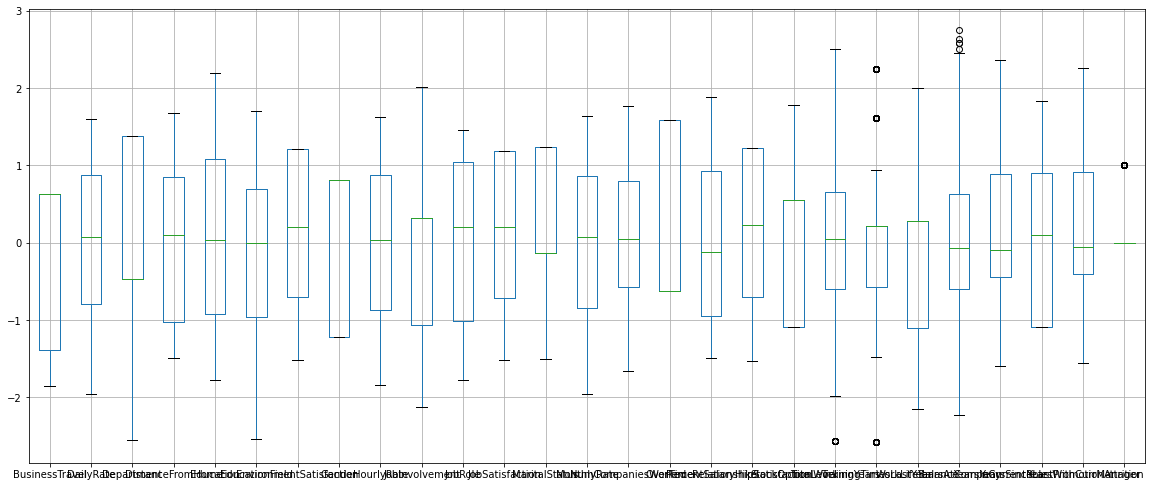

In [215]:
df1.boxplot(figsize=(20,10))
plt.subplots_adjust(bottom=0.25)
plt.show()

There may be outliers present in certain columns, which can be handled with Quartile

In [220]:
Q1 = np.percentile(df1, 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df1, 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

In [221]:
print("Old Shape: ", df1.shape)

Old Shape:  (1470, 27)


In [222]:
# Upper boundary
upper = np.where(df1 >= (Q3+1.5*IQR))
# Lower boundary
lower = np.where(df1 <= (Q1-1.5*IQR))

In [223]:
df1.drop(upper[0], inplace = True)
df1.drop(lower[0], inplace = True)
 
print("New Shape: ", df1.shape)

New Shape:  (1470, 27)


The Datset seems to have no outliers. So we shall proceed with Spliting the data.

# Spliting the data and Balancing 

In [225]:
x= df1.iloc[:,0:-1]
y=df1.iloc[:,-1]

In [226]:
y.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

The target variable is highly imbalanced which may affect lead to biasing and low performance. So we shall balance it with SMOTE

In [227]:
from imblearn.over_sampling import SMOTE

In [228]:
sm=SMOTE()
x1,y1= sm.fit_resample(x,y)

In [229]:
y1.value_counts()

0    1233
1    1233
Name: Attrition, dtype: int64

Now the model is balanced. So we will proceed to train the model

Since the Target variable is categorical with only 2 classes, we use LogisticRegression models to train our data

# Train The Model

In [231]:
from sklearn.linear_model import LogisticRegression,Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Check the best Random State

# LogisticRegression

In [247]:
maxacc=0
maxRS=0

for i in range(1,100):
    xtrain,xtest,ytrain,ytest= train_test_split(x1,y1,test_size=.20,random_state=i)
    lg=LogisticRegression()
    lg.fit(xtrain,ytrain)
    predlg= lg.predict(xtest)
    acc=accuracy_score(ytest,predlg)
    if acc>maxacc:
        maxacc=acc
        maxRS=i
print("Best Accuracy_score is", maxacc, 'on Random_state',maxRS)

Best Accuracy_score is 0.8319838056680162 on Random_state 95


# To Find the Best Cross Validation Score 

In [248]:
pred_tr= lg.predict(xtrain)
pred_ts= lg.predict(xtest)

In [249]:
train_accuracy= accuracy_score(ytrain,pred_tr)
test_accuracy= accuracy_score(ytest,pred_ts)

In [250]:
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score= cross_val_score(lg,x1,y1,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {train_accuracy} and the accuracy for testing is {test_accuracy}")
    print("\n")

At cross fold 2 the cv score is 0.7802108678021087 and accuracy score for training is 0.8017241379310345 and the accuracy for testing is 0.7449392712550608


At cross fold 3 the cv score is 0.7818329278183294 and accuracy score for training is 0.8017241379310345 and the accuracy for testing is 0.7449392712550608


At cross fold 4 the cv score is 0.7838606895535583 and accuracy score for training is 0.8017241379310345 and the accuracy for testing is 0.7449392712550608


At cross fold 5 the cv score is 0.7810233963751633 and accuracy score for training is 0.8017241379310345 and the accuracy for testing is 0.7449392712550608


At cross fold 6 the cv score is 0.7854825628548255 and accuracy score for training is 0.8017241379310345 and the accuracy for testing is 0.7449392712550608


At cross fold 7 the cv score is 0.7858798425370663 and accuracy score for training is 0.8017241379310345 and the accuracy for testing is 0.7449392712550608


At cross fold 8 the cv score is 0.7871012482662968 a

 Random_state= 95, CV score is best with cv=4. So we shall use this values to test other models as well

# Check The Accuracy and Error

In [251]:
xtrain,xtest,ytrain,ytest= train_test_split(x1,y1,test_size=.20,random_state=95)

# Logistic Regression

In [252]:
lg=LogisticRegression()
lg.fit(xtrain,ytrain)
predlg= lg.predict(xtest)
print( confusion_matrix(predlg,ytest))
print( classification_report(predlg,ytest))
print('Score:', lg.score(xtrain,ytrain))
print('Acc_score:', accuracy_score(predlg,ytest))

[[195  31]
 [ 52 216]]
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       226
           1       0.87      0.81      0.84       268

    accuracy                           0.83       494
   macro avg       0.83      0.83      0.83       494
weighted avg       0.84      0.83      0.83       494

Score: 0.7778904665314401
Acc_score: 0.8319838056680162


In [253]:
cr_lg=cross_val_score(lg,x1,y1, cv=4)
print('Cross Validation Score of LogisticRegression is:', cr_lg.mean())

Cross Validation Score of LogisticRegression is: 0.7838606895535583


Accuracy Score and CV Score are neraly same, which means the model works well with the dataset.

# GaussianNB

In [255]:
gnb=GaussianNB()
gnb.fit(xtrain,ytrain)
predgnb= gnb.predict(xtest)
print( confusion_matrix(predgnb,ytest))
print( classification_report(predgnb,ytest))
print('Acc_score:', accuracy_score(predgnb,ytest))

[[172  47]
 [ 75 200]]
              precision    recall  f1-score   support

           0       0.70      0.79      0.74       219
           1       0.81      0.73      0.77       275

    accuracy                           0.75       494
   macro avg       0.75      0.76      0.75       494
weighted avg       0.76      0.75      0.75       494

Acc_score: 0.7530364372469636


In [259]:
cr_gnb=cross_val_score(gnb,x1,y1, cv=4)
print('Cross Validation Score of GaussianNB is:', cr_gnb.mean())

Cross Validation Score of GaussianNB is: 0.7270872361026331


Accuracy and CV score are neraly same, so the model performs well with the dataset

# DecisionTreeClassifier

In [257]:
dtc=DecisionTreeClassifier()
dtc.fit(xtrain,ytrain)
preddtc= dtc.predict(xtest)
print( confusion_matrix(preddtc,ytest))
print( classification_report(preddtc,ytest))
print('Acc_score:', accuracy_score(preddtc,ytest))

[[209  35]
 [ 38 212]]
              precision    recall  f1-score   support

           0       0.85      0.86      0.85       244
           1       0.86      0.85      0.85       250

    accuracy                           0.85       494
   macro avg       0.85      0.85      0.85       494
weighted avg       0.85      0.85      0.85       494

Acc_score: 0.8522267206477733


In [258]:
cr_dtc=cross_val_score(dtc,x1,y1, cv=4)
print('Cross Validation Score of DecisionTreeClassifier is:', cr_dtc.mean())

Cross Validation Score of DecisionTreeClassifier is: 0.8349727156959734


Model works good so that accuracy_score and CV score are same.

# RandomForestClassifier

In [260]:
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)
predrf= rf.predict(xtest)
print( confusion_matrix(predrf,ytest))
print( classification_report(predrf,ytest))
print('Acc_score:', accuracy_score(predrf,ytest))

[[242  21]
 [  5 226]]
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       263
           1       0.91      0.98      0.95       231

    accuracy                           0.95       494
   macro avg       0.95      0.95      0.95       494
weighted avg       0.95      0.95      0.95       494

Acc_score: 0.9473684210526315


In [261]:
cr_rf=cross_val_score(rf,x1,y1, cv=4)
print('Cross Validation Score of RandomForestClassifier is:', cr_rf.mean())

Cross Validation Score of RandomForestClassifier is: 0.92744927276937


Among all the models, Accuracy Score and CV score are highest with RandomForestClassifier. So we shall tune the Hyper parameters to further improve the performance without any overfitting condition

# HyperParameter Tuning With GridSearchCV

In [262]:
from sklearn.model_selection import GridSearchCV

In [264]:
RandomForestClassifier()

RandomForestClassifier()

In [265]:
parameters={'max_features': ["auto", "sqrt", "log2"],
            'min_samples_leaf': [1,2,3],
            'criterion':["gini", "entropy"],
            'max_depth':[3,4,5,6]}

In [266]:
GCV=GridSearchCV(RandomForestClassifier(), parameters, cv=4, scoring='accuracy')
GCV.fit(xtrain,ytrain)
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'log2',
 'min_samples_leaf': 1}

In [267]:
GCV.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=6, max_features='log2')

In [268]:
GCV_pred=GCV.best_estimator_.predict(xtest)
accuracy_score(ytest,GCV_pred)

0.9109311740890689

In [271]:
rf=RandomForestClassifier(criterion='entropy',
                          max_depth=6,
                          max_features='log2',
                          min_samples_leaf= 1)
rf.fit(xtrain,ytrain)
predrf= rf.predict(xtest)
print( confusion_matrix(predrf,ytest))
print( classification_report(predrf,ytest))
print('Acc_score:', accuracy_score(predrf,ytest))

[[235  25]
 [ 12 222]]
              precision    recall  f1-score   support

           0       0.95      0.90      0.93       260
           1       0.90      0.95      0.92       234

    accuracy                           0.93       494
   macro avg       0.93      0.93      0.93       494
weighted avg       0.93      0.93      0.93       494

Acc_score: 0.9251012145748988


The accuracyis nearly 93% after tuning the parameters. So the model is performing well with the dataset

# ROC Curve

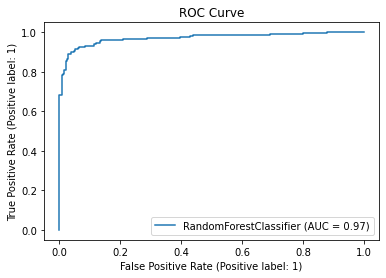

In [273]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(rf,xtest,ytest)
plt.title('ROC Curve')
plt.show()

AUC-ROC Curve shows that the model perfoms 97% well.

Area Under Curve is 97% fit. So the model has good performance

# Save The Model

In [274]:
import pickle
filename= 'HR_Attrtion.pkl'
pickle.dump(rf,open(filename, 'wb'))

# Compare Original results with the Predicted Results

In [278]:
x=np.array(ytest)
predicted= np.array(rf.predict(xtest))
df_con= pd.DataFrame({'original': x, 'Predicted': predicted}, index= range(len(x)))
df_con

,original,Predicted
0,1,1
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
489,1,1
490,0,0
491,1,1
492,1,1


The predicted results are nearly equal to the actual results. The model gave good performance.